In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
import Methods as ms
from Methods import CGT

## Construct CGT Objects (at different T)

In [2]:
#Temperatures tested
temps = [0.1, 0.5, 1, 2, 5]

In [3]:
#T = 0.1
f = [0, 0.5, 1, 2, 2.2, 2.5, 3, 3.5, 5]
t = 0.1
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT01'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT01'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT01 = CGT(f, t, Rgpaths, Reepaths)

In [4]:
#T = 0.5
f = [0, 0.5, 1, 2, 2.5, 3, 5, 7, 10]
t = 0.5
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT05'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT05'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT05 = CGT(f, t, Rgpaths, Reepaths)

In [5]:
#T = 1
f = [0, 0.5, 1, 2, 5, 7, 10]
t = 1
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT1'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT1'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT1 = CGT(f, t, Rgpaths, Reepaths)

In [6]:
#T = 2
f = [0, 0.5, 1, 2, 5, 7, 10]
t = 2
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT2'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT2'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT2 = CGT(f, t, Rgpaths, Reepaths)

Use temporary mean starting halfway:F = 0.5


In [7]:
#T = 5
f = [0,  0.5, 1, 2, 5, 7, 10]
t = 5
Rgfolder = '../Data/Block50/Radius of gyration/ForcesT5'
Reefolder = '../Data/Block50/End-to-end distance/ForcesT5'
Rgpaths = []
Reepaths = []
for path in os.listdir(Rgfolder):
    Rgpaths.append(Rgfolder + '/' + path)
    Rgpaths.sort()

for path in os.listdir(Reefolder):
    Reepaths.append(Reefolder + '/' + path)
    Reepaths.sort()

CGT5 = CGT(f, t, Rgpaths, Reepaths)

## Tf-Extension under constant force

In [8]:
lsCGTBl50 = [CGT01,CGT05,CGT1,CGT2,CGT5]
%store lsCGTBl50
forces = ms.lsForces(lsCGTBl50)
print(forces)

Stored 'lsCGTBl50' (list)
[0, 0.5, 1, 2, 2.5, 3, 5]


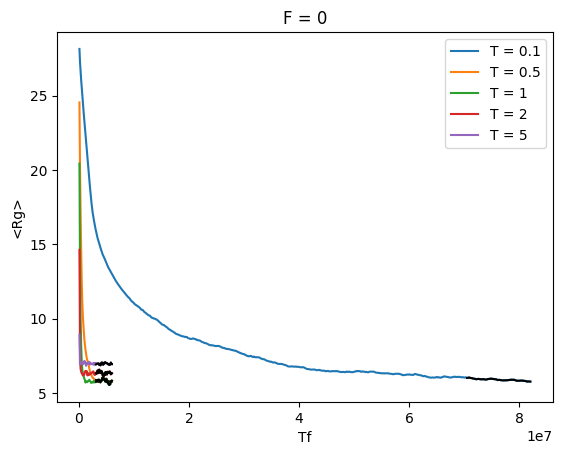

In [9]:
ms.Plot(lsCGTBl50, 0, "Rg")

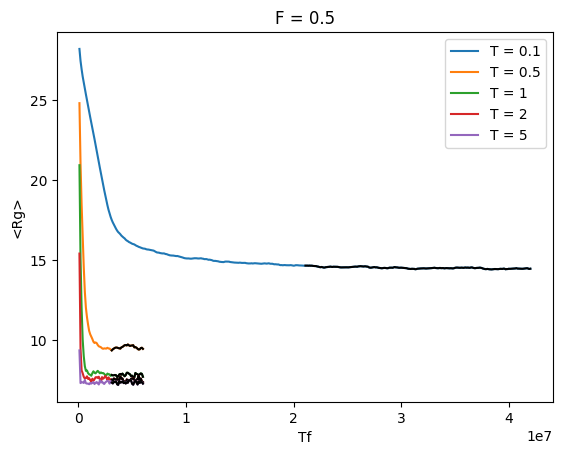

In [10]:
ms.Plot(lsCGTBl50, 0.5, "Rg")

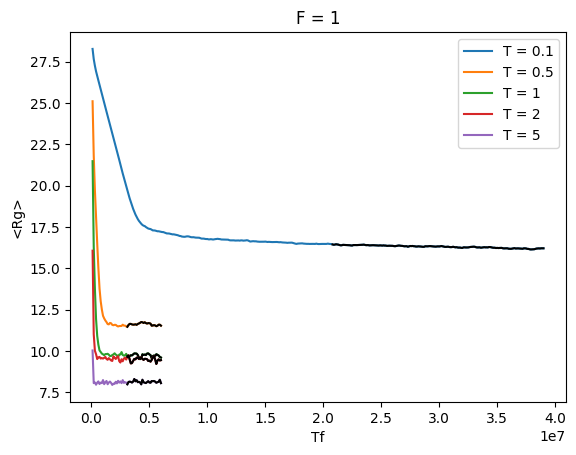

In [11]:
ms.Plot(lsCGTBl50, 1, "Rg")

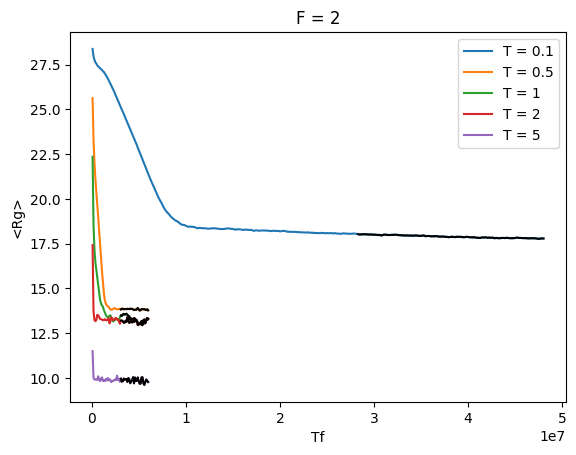

In [12]:
ms.Plot(lsCGTBl50, 2, "Rg")

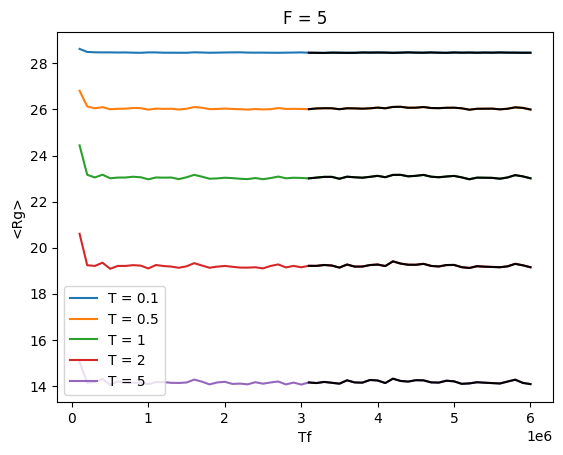

In [13]:
ms.Plot(lsCGTBl50, 5, "Rg")

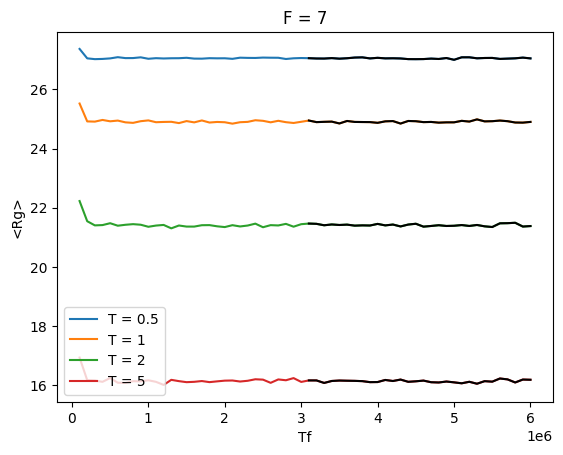

In [14]:
ms.Plot(lsCGTBl50, 7, "Rg")

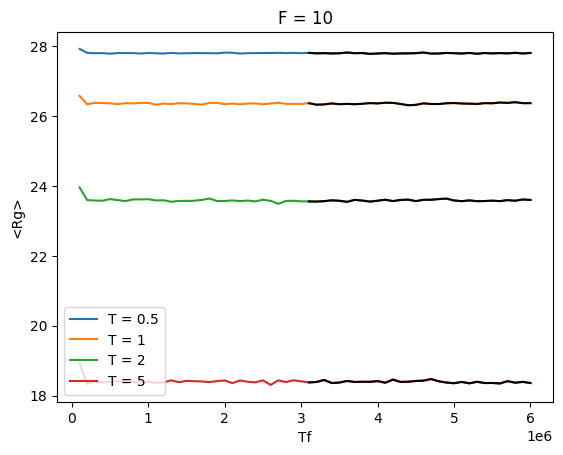

In [15]:
ms.Plot(lsCGTBl50, 10, "Rg")

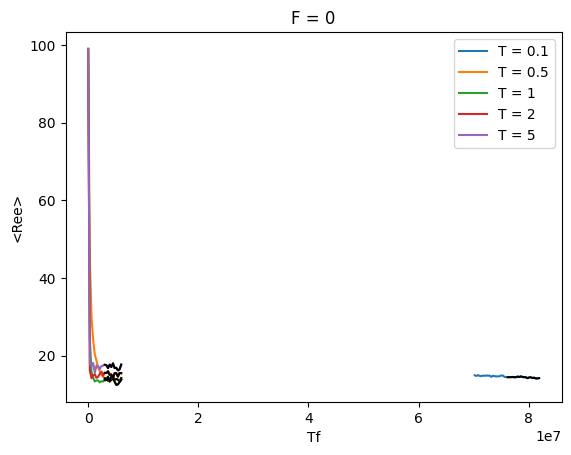

In [16]:
ms.Plot(lsCGTBl50, 0, "Ree")

Use temporary mean starting halfway:T = 2


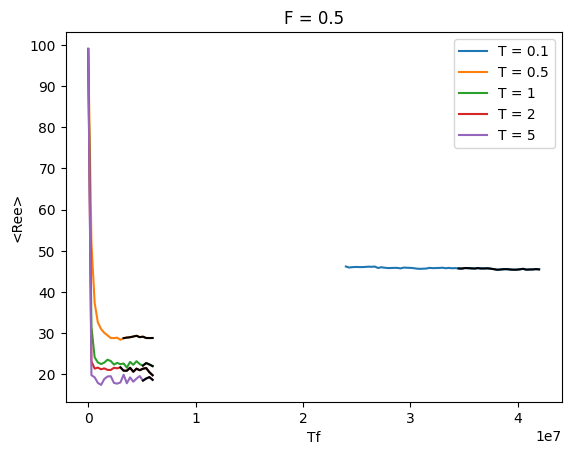

In [17]:
ms.Plot(lsCGTBl50, 0.5, "Ree")

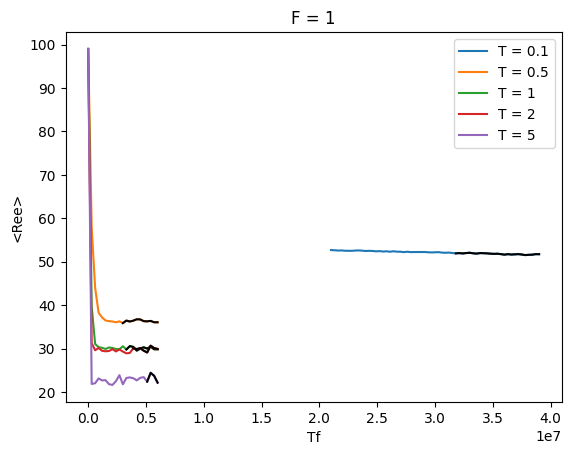

In [18]:
ms.Plot(lsCGTBl50, 1, "Ree")

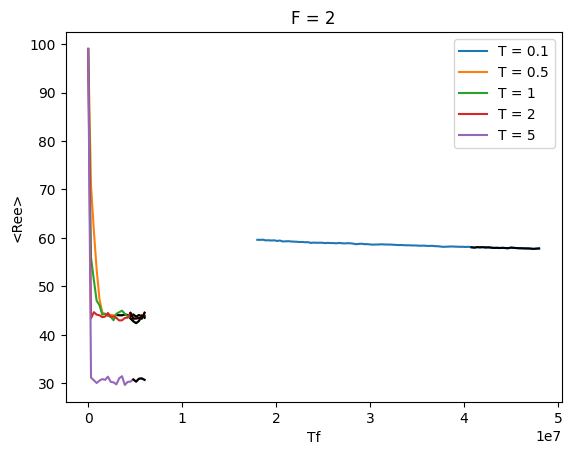

In [19]:
ms.Plot(lsCGTBl50, 2, "Ree")

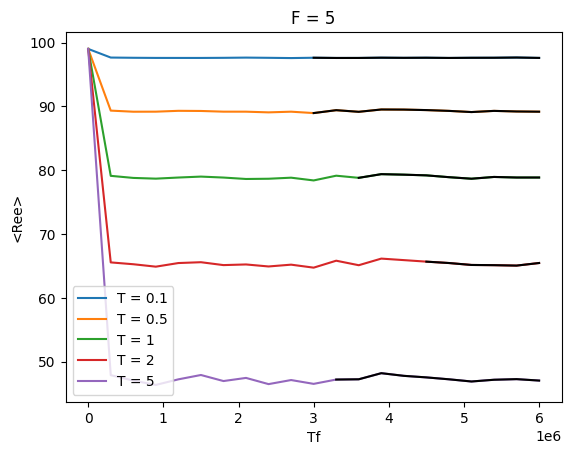

In [20]:
ms.Plot(lsCGTBl50, 5, "Ree")

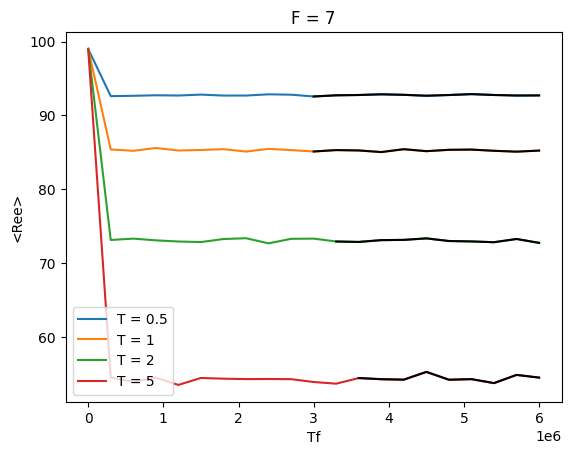

In [21]:
ms.Plot(lsCGTBl50, 7, "Ree")

## Graph Equilibirum

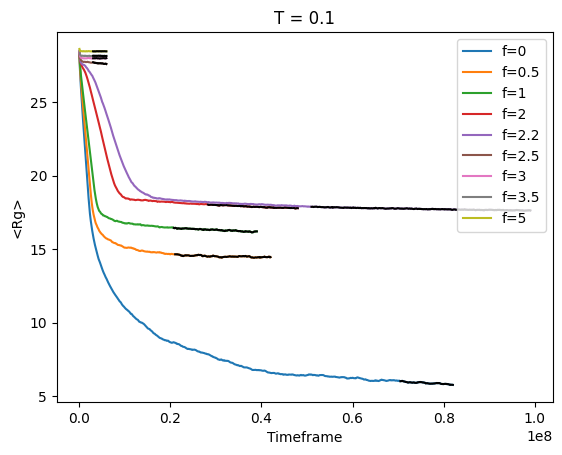

In [22]:
CGT01.Plot('Rg')
# plt.xlim(0,1e7)

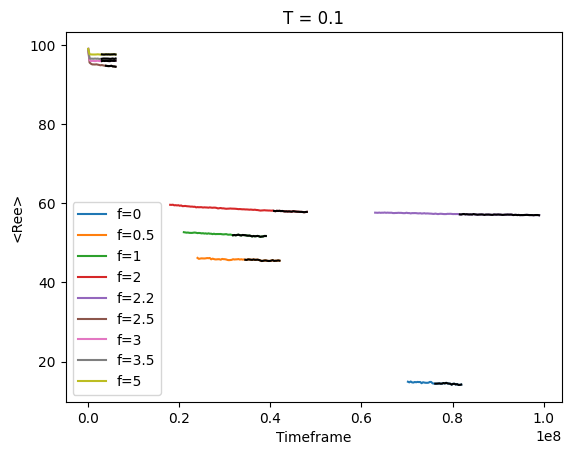

In [23]:
CGT01.Plot('Ree')

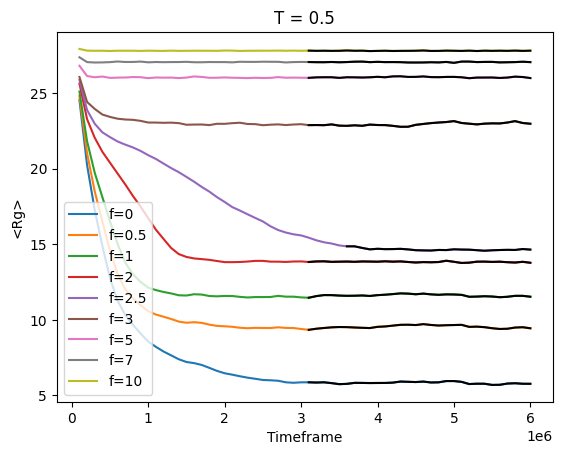

In [24]:
CGT05.Plot('Rg')

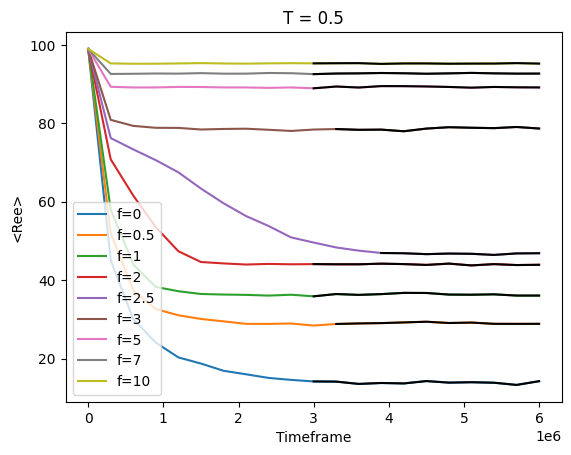

In [25]:
CGT05.Plot('Ree')


## Temperature Extension

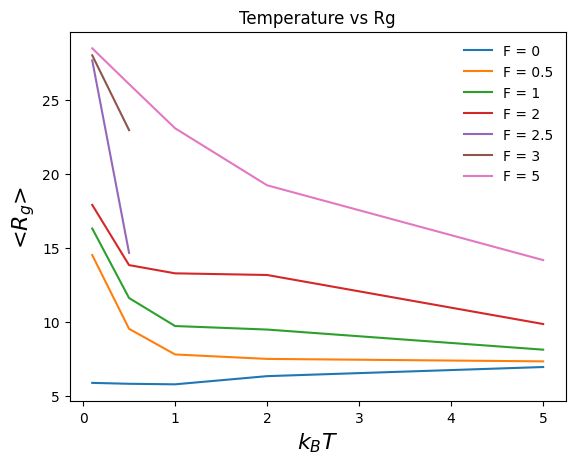

In [26]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl50:
        try:
            i = cgt.f.index(f)
        except ValueError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRg[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{g}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Rg")
plt.savefig('../Data/Block50/Figures/TvsRg')

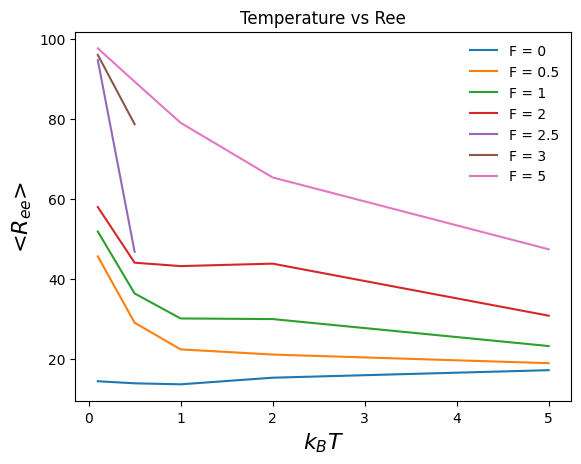

In [27]:
for f in forces:
    data = []
    tempsCopy = temps[:]
    for cgt in lsCGTBl50:
        try:
            i = cgt.f.index(f)
        except ValueError:
            tempsCopy.remove(cgt.t)
            continue
        data.append(cgt.aveRee[i])
    plt.plot(tempsCopy, data, label = 'F = ' + str(f))

plt.xlabel('$k_{B} T$', fontsize=16)
plt.ylabel('<$R_{ee}$>', fontsize=16)
plt.legend(frameon=False)
plt.title("Temperature vs Ree")
plt.savefig('../Data/Block50/Figures/TvsRee')

## Force Extension

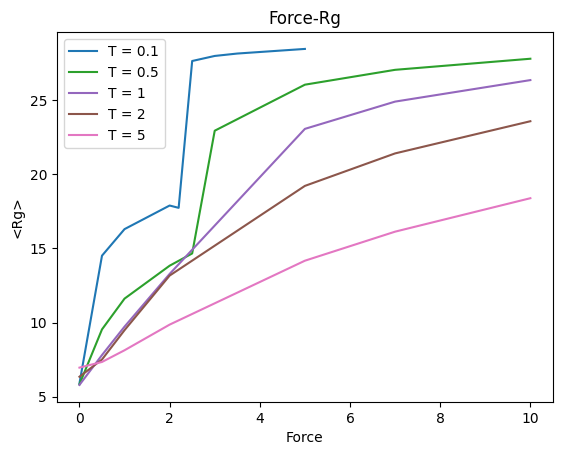

In [28]:
#Rg
for cgt in lsCGTBl50:
    plt.plot(cgt.f, cgt.aveRg, color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Rg>')
plt.title('Force-Rg')
plt.savefig('../Data/Block50/Figures/FvsRg')

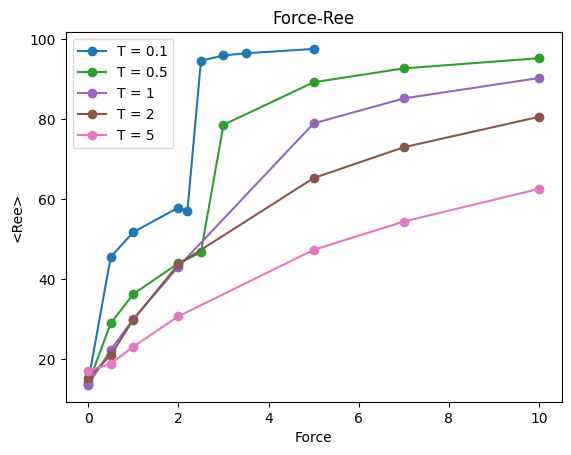

In [29]:
#Ree
for cgt in lsCGTBl50:
    plt.plot(cgt.f, cgt.aveRee, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

plt.legend()
plt.xlabel('Force')
plt.ylabel('<Ree>')
plt.title('Force-Ree')
plt.savefig('../Data/Block50/Figures/FvsRee')

/tmp/ipykernel_53549/359954499.py:7: RuntimeWarning: divide by zero encountered in divide
  y = 1 / np.tanh(x) - 1 / x
/tmp/ipykernel_53549/359954499.py:7: RuntimeWarning: invalid value encountered in subtract
  y = 1 / np.tanh(x) - 1 / x


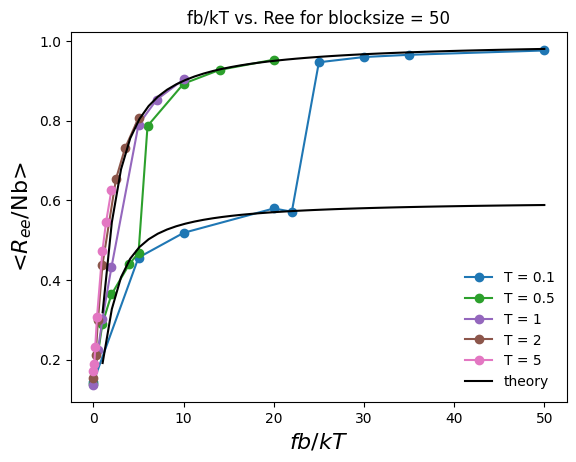

In [30]:
for cgt in lsCGTBl50:
    force = np.array(cgt.f)
    Ree = np.array(cgt.aveRee)
    plt.plot(force / cgt.t, Ree / 100, 'o-', color = cgt.color, label = 'T = ' + str(cgt.t))

x = np.linspace(0, 50)
y = 1 / np.tanh(x) - 1 / x
y2 = y * 3/5
plt.plot(x,y, color = 'k', label = 'theory')
plt.plot(x,y2, color = 'k')

plt.xlabel('$fb/kT$', fontsize=16)
plt.ylabel('<$R_{ee}$/Nb>', fontsize=16)
plt.legend(frameon=False)
plt.title("fb/kT vs. Ree for blocksize = 50")
plt.savefig('../Data/Block50/Figures/Fbkt vs Ree')
# plt.xlim(0,20)